In [ ]:
# Licenta
# This is a work in progress that tries to segment bladder cancer
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


In [ ]:
import os
inputFolder = '../input/'
for root, directories, filenames in os.walk(inputFolder):
    for filename in filenames: print(os.path.join(root,filename))

../input/datefinale/x_second_batch.npz
../input/datefinale/y_valid_first_batch.npz
../input/datefinale/x_valid_first_batch.npz
../input/datefinale/y_valid_second_batch.npz
../input/datefinale/x_valid_second_batch.npz
../input/datefinale/x_first_batch.npz
../input/datefinale/y_test.npz
../input/datefinale/y_second_batch.npz
../input/datefinale/x_test.npz
../input/datefinale/y_first_batch.npz
../input/datefinale/__results___files/__results___11_0.png
../input/datefinale/__results___files/__results___60_0.png
../input/datefinale/__results___files/__results___10_0.png
../input/datefinale/__results___files/__results___31_0.png
../input/datefinale/__results___files/__results___40_1.png
../input/datefinale/__results___files/__results___12_0.png
../input/datefinale/__results___files/__results___30_0.png
../input/datefinale/__results___files/__results___62_0.png
../input/datefinale/__results___files/__results___29_0.png
../input/date5perpacient/x_second_batch.npz
../input/date5perpacient/y_vali

# Set up Tensorboard

In [ ]:
# # Download Ngrok to tunnel the tensorboard port to an external port
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip 
# !unzip ngrok-stable-linux-amd64.zip 

# # Run tensorboard as well as Ngrox (for tunneling as non-blocking processes)
# import os
# import multiprocessing


# pool = multiprocessing.Pool(processes = 10)
# results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
#                         for cmd in [
#                         f"tensorboard --logdir ./logs/ --host 0.0.0.0 --port 6006 &",
#                         "./ngrok http 6006 &"
#                         ]]

In [ ]:
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

# Importing the libraries

In [ ]:
!pip install pynrrd

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
%matplotlib inline

# Importing libraries needed for data processing

import os
import numpy as np
import nrrd
import tensorflow as tf
from numpy import load
# Adding a path

from pathlib import Path


# Necessary libraries for image alteration and animations

from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from scipy import ndimage
from skimage import measure
import matplotlib.pyplot as plt
import matplotlib.animation as animation




# Keras

import os
import skimage.io as io
import skimage.transform as trans
# import tensorflow.contrib.keras as keras
# from tensorflow.keras.models import Model


In [ ]:

from tensorflow.keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping , ReduceLROnPlateau
from keras import backend as keras
from keras import utils
from keras.utils import np_utils
from functools import partial
from keras import backend as K


# Importing needed libraries for constructing 3DUnet
from keras.layers import Input, LeakyReLU, Add, UpSampling3D, Activation, SpatialDropout3D, Conv3D,Conv3DTranspose,PReLU,Softmax,ReLU,Concatenate 
from keras.engine import Model
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.losses import categorical_crossentropy,mse

# K.set_image_data_format("channels_first")
K.set_image_data_format("channels_last")

# Time
from tqdm.notebook import tqdm
import time
import datetime

# Visualization
import tensorboard

# Post-processing
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

# Loading the data

In [ ]:
# Training data

package = 'date5perpacient'
# package = 'scenariu-2-final-final'
x_interm_train = load('../input/'+ package +'/x_first_batch.npz')
y_interm_train = load('../input/'+ package +'/y_first_batch.npz')

# Validation data
x_interm_valid = load('../input/'+ package +'/x_valid_first_batch.npz')
y_interm_valid = load('../input/'+ package +'/y_valid_first_batch.npz')

# Data from the second batch of patients
x_second = load('../input/'+ package +'/x_second_batch.npz')
y_second = load('../input/'+ package +'/y_second_batch.npz')

# Validation data from the second batch of patients
x_valid_second = load('../input/'+ package +'/x_valid_second_batch.npz')
y_valid_second = load('../input/'+ package +'/y_valid_second_batch.npz')

# Data from the second batch of patients
x_test = load('../input/'+ package +'/x_test.npz')
y_test = load('../input/'+ package +'/y_test.npz')


In [ ]:
x_train_first = x_interm_train['arr_0']
y_train_first = y_interm_train['arr_0']

x_valid_first = x_interm_valid['arr_0']
y_valid_first = y_interm_valid['arr_0']

x_train_second = x_second['arr_0']
y_train_second = y_second['arr_0']

x_valid_second = x_valid_second['arr_0']
y_valid_second = y_valid_second['arr_0']

x_test = x_test['arr_0']
y_test = y_test['arr_0']

In [ ]:
x_train_first = np.concatenate((x_train_second,x_train_first),axis=0)
y_train_first = np.concatenate((y_train_second,y_train_first),axis=0)

x_valid_first = np.concatenate((x_valid_second,x_valid_first),axis=0)
y_valid_first = np.concatenate((y_valid_second,y_valid_first),axis=0)

In [ ]:
print('|---------------------------------------------|')
print('|           X          |           Y          |')
print('|----------------------|----------------------|')
print('|                First   batch                |')
print('|---------------------------------------------|')
print('|'+str(x_train_first.shape)+' |'+str(y_train_first.shape)+' |')
print('|'+str(x_valid_first.shape)+'  |'+str(y_valid_first.shape)+'  |')
print('|---------------------------------------------|')
print('|                 Second batch                |')
print('|---------------------------------------------|')
print('|'+str(x_train_second.shape)+' |'+str(y_train_second.shape)+' |')
print('|'+str(x_valid_second.shape)+'  | '+str(y_valid_second.shape)+' |')
print('|---------------------------------------------|')
print('|                    Test                     |')
print('|---------------------------------------------|')
print('| '+str(x_test.shape)+' | '+str(y_test.shape)+' |')
print('|---------------------------------------------|')



|---------------------------------------------|
|           X          |           Y          |
|----------------------|----------------------|
|                First   batch                |
|---------------------------------------------|
|(84, 128, 128, 32, 1) |(84, 128, 128, 32, 3) |
|(14, 128, 128, 32, 1)  |(14, 128, 128, 32, 3)  |
|---------------------------------------------|
|                 Second batch                |
|---------------------------------------------|
|(42, 128, 128, 32, 1) |(42, 128, 128, 32, 3) |
|(7, 128, 128, 32, 1)  | (7, 128, 128, 32, 3) |
|---------------------------------------------|
|                    Test                     |
|---------------------------------------------|
| (5, 128, 128, 32, 1) | (5, 128, 128, 32, 3) |
|---------------------------------------------|


# Vizualizing the data

In [ ]:
def ground_truth_visualize(x,nr):
    fig, ax = plt.subplots(1,3, figsize=[12, 12])
    img_org = x_train_first[nr][:,:,x]
    img_label_1 = y_train_first[nr][:,:,x,1]
    img_label_2 = y_train_first[nr][:,:,x,2]
    rotated_img = ndimage.rotate(img_org, 270)
    rotated_img_lb = ndimage.rotate(img_label_1, 270)
    rotated_img_lb_2 = ndimage.rotate(img_label_2, 270)
#     ax[0].set_title(" Original ")
    ax[0].imshow(rotated_img,cmap='gray')
    ax[0].axis('off')
#     ax[1].set_title("Segmentation Class 1")
    ax[1].imshow(rotated_img_lb,cmap='gray')
    ax[1].axis('off')
#     ax[2].set_title("Segmentation Class 2")
    ax[2].imshow(rotated_img_lb_2,cmap='gray')
    ax[2].axis('off')
    plt.show()


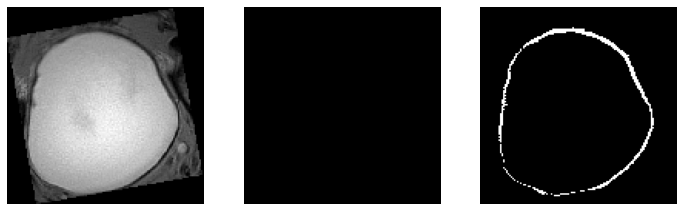

In [ ]:
ground_truth_visualize(10,15)

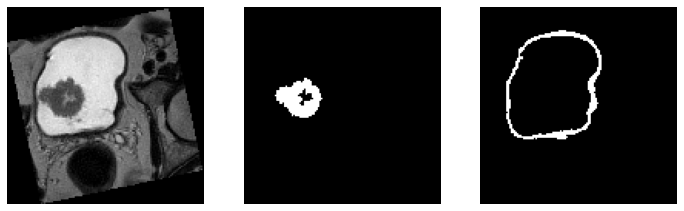

In [ ]:
ground_truth_visualize(18,9)

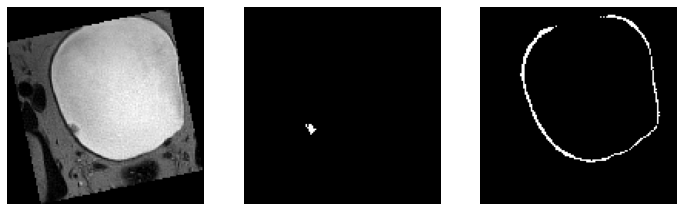

In [ ]:
ground_truth_visualize(16,25)

# Separare date

In [ ]:
def function_delete_surplus_data_nr(X,Y,nr):
  
    indexes = [i for i in range(X.shape[0])]
    indexes_2 = np.random.choice(indexes,size=nr,replace=False)

    x_l=[X[i] for i in indexes_2]
    y_l=[Y[i] for i in indexes_2]
    return x_l,y_l

In [ ]:
def function_shuffle(X,Y):
  
    indexes = [i for i in range(X.shape[0])]
    trainSample = np.random.choice(indexes,size=len(indexes),replace=False)

    x_train=[X[i] for i in trainSample]
    y_train=[Y[i] for i in trainSample]
    
    y_train = np.array(y_train)
    x_train = np.array(x_train)

    return x_train,y_train

In [ ]:
# x_train, y_train = function_delete_surplus_data(x_train, y_train, 90)
x_train_first, y_train_first = function_shuffle(x_train_first, y_train_first)
# x_valid, y_valid = function_delete_surplus_data_nr(x_valid,y_valid,9)


# Metrics and loss functions

In [ ]:
#INCERCATE DAR NIMIC BUN

def dice_coefficient(y_true, y_pred, smooth=1.):
    """
    Calcularea coeficientul DICE
    :param y_true:(3D Numpy Array) imaginea originala
    :param y_true:(3D Numpy Array) imaginea prezisa de model
    :returns:
    coeficientul DICE (float)
    """
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_multilabel(y_true, y_pred, numLabels=3,weights=[0.1,0.4,0.5]):
    dice=0
    for index in range(numLabels):
        dice += weights[index]*dice_coef(y_true[:,index,:,:,:], y_pred[:,index,:,:,:])
    
    return 1-dice

def dice_coefficient_loss(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):
    
    dice_numerator = 2*K.sum(y_true*y_pred,axis=(1,2,3))+epsilon
    dice_denominator = K.sum(y_true+y_pred,axis=(1,2,3))+epsilon
    dice_coefficient = K.mean(dice_numerator/dice_denominator)
   
    return 1-dice_coefficient

def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
   
    dice_numerator = 2.*K.sum(y_true*y_pred,axis=(0,1,2,3))+epsilon
    dice_denominator = K.sum(y_true*y_true + y_pred*y_pred,axis=(0,1,2,3))+epsilon
    
    dice_loss = 3 - K.sum(dice_numerator/dice_denominator)

    return dice_loss

# --- METRICS ---

def dice_coefficient(y_true, y_pred, smooth=1.):
    """
    Calcularea coeficientul DICE
    :param y_true:(3D Numpy Array) imaginea originala
    :param y_true:(3D Numpy Array) imaginea prezisa de model
    :returns:
    coeficientul DICE (float)
    """
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dsc(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def auc(y_true, y_pred):
    smooth = 1
    y_pred_pos = np.round(np.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    y_pos = np.round(np.clip(y_true, 0, 1))
    y_neg = 1 - y_pos
    tp = np.sum(y_pos * y_pred_pos)
    tn = np.sum(y_neg * y_pred_neg)
    fp = np.sum(y_neg * y_pred_pos)
    fn = np.sum(y_pos * y_pred_neg)
    tpr = (tp + smooth) / (tp + fn + smooth) #recall
    tnr = (tn + smooth) / (tn + fp + smooth)
    prec = (tp + smooth) / (tp + fp + smooth) #precision
    return [tpr, tnr, prec]

def confusion(y_true, y_pred):
    smooth=1
    y_pred_pos = K.clip(y_pred, 0, 1)
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.clip(y_true, 0, 1)
    y_neg = 1 - y_pos
    tp = K.sum(y_pos * y_pred_pos)
    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg) 
    prec = (tp + smooth)/(tp+fp+smooth)
    recall = (tp+smooth)/(tp+fn+smooth)
    return prec, recall


In [ ]:
def tanimoto_coefficient(y_true, y_pred, smooth=1.):
    """
    Calcularea coeficientul DICE
    :param y_true:(3D Numpy Array) imaginea originala
    :param y_true:(3D Numpy Array) imaginea prezisa de model
    :returns:
    coeficientul DICE (float)
    """
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + smooth)

In [ ]:
from keras import backend as K
import numpy as np
import tensorflow as tf
from scipy.ndimage import distance_transform_edt as distance


def calc_dist_map(seg):
    res = np.zeros_like(seg)
    posmask = seg.astype(np.bool)

    if posmask.any():
        negmask = ~posmask
        res = distance(negmask) * negmask - (distance(posmask) - 1) * posmask

    return res

def calc_dist_map_batch(y_true):
    y_true_numpy = y_true.numpy()
    return np.array([calc_dist_map(y)
                     for y in y_true_numpy]).astype(np.float32)

def surface_loss(y_true, y_pred):
    y_true_dist_map = tf.py_function(func=calc_dist_map_batch,
                                     inp=[y_true],
                                     Tout=tf.float32)
    multipled = y_pred * y_true_dist_map
    return K.mean(multipled)

In [ ]:
# y_train=np.moveaxis(y_train,-1,-4)

In [ ]:
# Ref: salehi17, "Twersky loss function for image segmentation using 3D FCDN"
# -> the score is computed for each class separately and then summed
# alpha=beta=0.5 : dice coefficient
# alpha=beta=1   : tanimoto coefficient (also known as jaccard)
# alpha+beta=1   : produces set of F*-scores
# implemented by E. Moebel, 06/04/18

def tversky_loss(y_true, y_pred):
    alpha = 0.5
    beta  = 0.5
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    # alpha - FP      beta - FN
    num = K.sum(p0*g0, (0,1,2,3))
    den = num + alpha*K.sum(p0*g1,(0,1,2,3)) + beta*K.sum(p1*g0,(0,1,2,3))
    
    T = K.sum(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    Ncl = K.cast(K.shape(y_true)[-1], 'float32')
    return Ncl - T



In [ ]:
def tversky_loss_mean(y_true, y_pred):  
    # a mers intr-un mod interesant, trb schimbat cv la el dar da rezultate surprinzatoare
    alpha = 0.5
    beta  = 0.5
    
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    # alpha - FP      beta - FN
    num = K.sum(p0*g0, (0,1,2,3))
    den = num + alpha*K.sum(p0*g1,(0,1,2,3)) + beta*K.sum(p1*g0,(0,1,2,3))
    
    T = K.mean(num/den) # when summing over classes, T has dynamic range [0 Ncl]

    return 1. - T

def focal_tversky_loss_mean(y_true,y_pred): # nu prea a mers
    pt_1 = tversky_loss_mean(y_true, y_pred)
    gamma = 3
    return K.pow(pt_1, 1/gamma)

In [ ]:
def GDC(y_true, y_pred):
#     weights = None
    weights = [1,5,7]
    
    if weights == None:
        weights = np.zeros((1,3))
        weights=1/((K.sum(g0,(0,1,2,3)).numpy())**2+1e-4)

    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    
    # alpha - FP      beta - FN
    num = weights*K.sum(p0*g0, (0,1,2,3))
    den = weights*K.sum(p0+g0,(0,1,2,3))
    T = K.mean(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    Res = 1 - 2*T
    return Res

In [ ]:
def pGDC(y_true, y_pred):
    alpha = 0.5
    beta  = 0.5
    #weights = None
    weights = K.constant([1,5,10])
    
    if weights == None:
        weights = np.zeros((1,3))
        weights = 1/((K.sum(g0,(0,1,2,3)).numpy())**2+1e-4)

    
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    
    # alpha - FP      beta - FN
    num = weights*K.sum(p0*g0, (0,1,2,3))
    den = weights*(K.sum(p0+g0,(0,1,2,3))+ alpha*K.sum(p0*g1,(0,1,2,3)) + beta*K.sum(p1*g0,(0,1,2,3)))
    
    T = K.mean(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    return 1- 2.*T

In [ ]:

def soft_dice_loss_sum_2tp_sum(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
    """
    paper: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9180275
    TODO:: Trb sa mai incerc cu CE si weighted dice loss
    """
    p0 = y_pred
    p1 = 1- y_pred
    g0 = y_true
    g1 = 1- y_true
    dice_numerator = 2.*K.sum(y_true*y_pred,axis=(0,1,2,3))+epsilon
    dice_denominator = K.sum(2.*y_true*y_pred + p0*g1 + p1*g0 ,axis=(0,1,2,3))+epsilon
    
    dice_loss = 3 - K.sum(dice_numerator/dice_denominator)

    return dice_loss

def soft_dice_loss_mean_2tp_mean(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
    """
    paper: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9180275
    TODO:: Trb sa mai incerc cu CE si weighted dice loss
    """
    p0 = y_pred
    p1 = 1- y_pred
    g0 = y_true
    g1 = 1- y_true
    dice_numerator = 2.*K.sum(y_true*y_pred,axis=(0,1,2,3))+epsilon
    dice_denominator = K.sum(2.*y_true*y_pred + p0*g1 + p1*g0 ,axis=(0,1,2,3))+epsilon
    
    dice_loss = 1 - K.mean(dice_numerator/dice_denominator)

    return dice_loss

def soft_dice_loss_mean_powtp_sum(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
   
    dice_numerator = 2.*K.sum(y_true*y_pred,axis=(0,1,2,3))+epsilon
    dice_denominator = K.sum(y_true*y_true + y_pred*y_pred,axis=(0,1,2,3))+epsilon
    
    dice_loss = 3 - K.sum(dice_numerator/dice_denominator)

    return dice_loss

def soft_dice_loss_mean_powtp_mean(y_true, y_pred,
                   epsilon=0.00001):
   
    dice_numerator = 2.*K.sum(y_true*y_pred,axis=(0,1,2,3))+epsilon
    dice_denominator = K.sum(y_true*y_true + y_pred*y_pred,axis=(0,1,2,3))+epsilon
    
    dice_loss = 1 - K.mean(dice_numerator/dice_denominator)

    return dice_loss

In [ ]:
def categorical_crossentropy_multi_class(y_true,y_pred):
    """
    paper: https://arxiv.org/pdf/1708.02002.pdf
    gamma: [0,5]
    When γ = 0, FL is equivalent to CE
    γ is increased the effect of the modulating factor is likewise increased 
    they found γ = 2 to work best in their experiments
    """
    gamma = 2
    alpha = 0.25
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    # alpha - FP      beta - FN

    T = K.sum((K.pow(y_true,gamma)*K.log(y_pred)) + ((1-y_true)**gamma)*K.log(1-y_pred), axis = (0,1,2,3))
    T = alpha*K.mean(T)

    return -T

In [ ]:
def focal_loss_mean(y_true, y_pred,gamma=2., alpha=.25):

    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

    return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1+K.epsilon())) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))

In [ ]:
def focal_loss_sum_mean(y_true, y_pred,gamma=2., alpha=.25):

    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

    return -K.sum(alpha * K.mean(K.pow(1. - pt_1, gamma) * K.log(pt_1+K.epsilon()),axis=(0,1,2,3))) - K.sum((1 - alpha) * K.mean(K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()),axis=(0,1,2,3)))


In [ ]:
def weighted_categorical_crossentropy(y_true,y_pred,weights=[1,10,5]):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes

    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    weights = K.variable(weights)
    # scale predictions so that the class probas of each sample sum to 1
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    # calc
    loss = y_true * K.log(y_pred) * weights
    loss = -K.sum(loss, -1)
    return loss

In [ ]:
def weighted_categorical_crossentropy_a(y_true,y_pred,weights=[1,10,5]):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes

    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """

    weights = K.variable(weights)
    # scale predictions so that the class probas of each sample sum to 1
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    # calc
    loss = y_true * K.log(y_pred) * weights
    loss = -K.mean(loss)
    return loss

  

In [ ]:

def weighted_categorical_crossentropy_inverse(y_true,y_pred):
    #     A weighted version of keras.objectives.categorical_crossentropy
    """
     Variables:
         weights: numpy array of shape (C,) where C is the number of classes

     Usage:
         weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
         loss = weighted_categorical_crossentropy(weights)
         model.compile(loss=loss,optimizer='adam')
     """
    
    N = K.sum(K.ones(y_true.shape[1:-1]))
    N = tf.cast(N,tf.float32)
    
#     weights = K.variable(weights)

    weights = 1/K.sum(y_true,axis=(0,1,2,3))
    
    # scale predictions so that the class probas of each sample sum to 1
#     y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    
    # clip to prevent NaN's and Inf's
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    loss = K.sum(y_true * K.log(y_pred) * weights,axis=-1)
    loss = loss * 1/N
    # calc
    
    return -loss

In [ ]:
def weighted_categorical_crossentropy_median(y_true,y_pred):
    #     A weighted version of keras.objectives.categorical_crossentropy
    """
     Variables:
         weights: numpy array of shape (C,) where C is the number of classes

     Usage:
         weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
         loss = weighted_categorical_crossentropy(weights)
         model.compile(loss=loss,optimizer='adam')
     """
    
    N = K.sum(K.ones(y_true.shape[1:-1]))
    N = tf.cast(N,tf.float32)
    
    Fc = K.sum(y_true,axis=(0,1,2,3))/N
    medianFc= K.mean(Fc)
#     weights = K.variable(weights)

    weights = medianFc/Fc
    
    # scale predictions so that the class probas of each sample sum to 1
#     y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    
    # clip to prevent NaN's and Inf's
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    loss = K.sum(y_true * K.log(y_pred) * weights,axis=-1)
    
    loss = loss * 1/N
    # calc
    return - loss

In [ ]:
def weighted_categorical_crossentropy_focal(y_true,y_pred):
    """
     Variables:
         weights: numpy array of shape (C,) where C is the number of classes

     Usage:
         weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
         loss = weighted_categorical_crossentropy(weights)
         model.compile(loss=loss,optimizer='adam')
     """
    N = K.sum(K.ones(y_true.shape[1:-1]))
    N = tf.cast(N,tf.float32)

    # clip to prevent NaN's and Inf's
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    loss = K.sum(y_true * (1-y_pred) * (1-y_pred) * K.log(y_pred),axis=-1)

    loss = loss * 1/N
    # calc
    return - loss

In [ ]:
def ELL_Dice(y_true,y_pred,gamma=1):
    num = K.sum(2*y_true*y_pred + 1.,axis=(0,1,2,3))
    dem = K.sum(y_true+y_pred +1.,axis=(0,1,2,3))
    dice = num/dem
    dice = K.mean(K.pow(-K.log(dice),gamma))
    return dice

In [ ]:
def ELL(y_true,y_pred):
    """

    """
    weight = K.sum(y_pred,axis=(0,1,2,3))
    weight = weight/K.sum(y_true,axis=(0,1,2,3))
    T = K.mean(weight*y_true*K.log(y_pred))
    D = ELL_Dice(y_true,y_pred)
    return T + D

In [ ]:
# def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
#     weight_a = alpha * (1 - y_pred) ** gamma * targets
#     weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)

#     return (tf.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b 


# def focal_loss(y_true, y_pred):
#     y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
#     logits = tf.log(y_pred / (1 - y_pred))

#     loss = focshow_labelsal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)

#     return tf.reduce_mean(loss)

In [ ]:
# def weighted_categorical_crossentropy_median(y_true,y_pred,weights=[1,10,5]):
#     """
#     A weighted version of keras.objectives.categorical_crossentropy
    
#     Variables:
#         weights: numpy array of shape (C,) where C is the number of classes

#     Usage:
#         weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
#         loss = weighted_categorical_crossentropy(weights)
#         model.compile(loss=loss,optimizer='adam')
#     """
#     # scale predictions so that the class probas of each sample sum to 1
#     N_m = K.ones(y_true.shape)
#     N = K.sum(N_m)
#     Fc = K.sum(y_true/N, axis=(0,1,2,3))
#     weights = K.mean(Fc)/Fc

#     # clip to prevent NaN's and Inf's
#     y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())

#     loss = K.sum(y_true*K.log(y_pred),axis=(0,1,2,3)) * weights
#     loss = -(1/K.sum(N)) *K.sum(loss)
#     return loss

# # DPT and Focal and DTM

In [ ]:
# m=categorical_crossentropy(y_test,y_test)
# m

In [ ]:
# -K.sum(m)/K.sum(K.ones(m.shape))

# Loading the model

In [ ]:
# # FOR LOADING AN ALREADY TRAINED MODEL

# dependencies = {
#     'dice_coefficient' : dice_coefficient,
#     'auc' : auc,
#     'confusion' : confusion,
#     'tversky_loss' : tversky_loss,
#     'weighted_categorical_crossentropy': weighted_categorical_crossentropy
# }

# # # import tensorflow as tf
# # # mdel=tf.keras.models.load_model("../input/modele-antrenate/model_antrenat.h5",custom_objects=dependencies)

# import tensorflow as tf
# model_unet_3d=tf.keras.models.load_model("../input/modele-antrenate/model_antrenat_weigh_cat_cross_40_epochs_scenariu_1.h5", custom_objects=dependencies)

In [ ]:
# # # FOR LOADING AN ALREADY TRAINED MODEL

# dependencies = {
#     'dice_coefficient' : dice_coefficient,
#     'auc' : auc,
#     'confusion' : confusion,
#     'tversky_loss' : tversky_loss,
#     'weighted_categorical_crossentropy': weighted_categorical_crossentropy
# }

# # # import tensorflow as tf
# # # mdel=tf.keras.models.load_model("../input/modele-antrenate/model_antrenat.h5",custom_objects=dependencies)

# import tensorflow as tf
# model_unet_3d_5lvl_sc1=tf.keras.models.load_model("../input/modele-antrenate/model_antrenat_2_weigh_cat_cross_40_epochs_scenariu_1.h5", custom_objects=dependencies)

In [ ]:
# # FOR LOADING AN ALREADY TRAINED MODEL
# dependencies = {
#     'dice_coefficient' : dice_coefficient,
#     'auc' : auc,
#     'confusion' : confusion,
#     'tversky_loss' : tversky_loss,
#     'weighted_categorical_crossentropy': weighted_categorical_crossentropy
# }

# import tensorflow as tf
# model_unet_3d=tf.keras.models.load_model("../input/movel-lvl5/U-Net_nuclei.h5", custom_objects=dependencies)

# Crearea modelului 


#### Pentru crearea modelului s-a folosit o arhitectura similara cu ce este propus in articolul:
Dolz, J., Xu, X., Rony, J., Yuan, J., Liu, Y., Granger, E., Desrosiers, C., Zhang, X., Ben Ayed, I., & Lu, H. (2018). Multiregion segmentation of bladder cancer structures in MRI with progressive dilated convolutional networks. Medical Physics, 45(12), 5482–5493. https://doi.org/10.1002/mp.13240

![image.png](attachment:image.png)

Modelul are o adancime de 6 nivele si este format din doua parti: *Encoder* si *Decoder*

Encoder-ul este alcatuit in felul urmator:
- 15 layere convolutionale (urmate de BatchNormalization + activare folosind PReLU) in care se alterneaza rata de dilatare de la 1 la 2 si respectiv 4) in care primul layer pentru fiecare adancime are strides= 2
- un "bridge" bloc format din 2 layere convolutionale(fiecare cu normalizare si PReLU) si un bloc rezidual

Decoder-ul este alcatuit in felul urmator:
- 6 adancimi, la inceputul fiecarei adancimi are loc UpSampling3D, pentru a se reveni la forma initiala urmat de 2 layere convolutionale(cu BatchNormalization si PReLU)
- In final se aplica un layer convolutional cu 3 filtere si kernel_size=(1,1,1)(sunt 3 filtere deoarece numarul de clase in care vrem sa impartim imaginea este 3) cu BatchNormalization si PReLU urmat de un layer de activare Softmax 

**Modelul este diferit fata de cel implementat in articol prin faptul ca adancimea este 6 si nu 5**



In [ ]:
def convolutional_layer(layer,n_filters,dilation_rate=1,strides=1,padding='same'):
    """
    Crearea unui layer convolutional pe baza celui vechi, caruia i se aplica BatchNormalization si activare PReLU
    :param layer: layer-ul curent
    :param n_filters:(int) numarul de filtere pe care o sa-l aiba noul layer
    :param dilation_rate:(int) rata de dilatare pe care o sa-l aiba noul layer
    :param strides:(int) numarul de strides pe care o sa-l aiba noul layer
    :param padding:(string) ce fel de padding o sa aiba noul layer
    :returns:
    noul layer
    """
    layer2 = Conv3D(n_filters, kernel_size=(3,3,3), padding=padding, strides=strides,dilation_rate=dilation_rate)(layer)
    layer2=BatchNormalization(axis=-1)(layer2)
    layer2=PReLU()(layer2)
    
    return layer2


def model_6lvl(input_shape,initial_learning_rate=1e-4):
    """
    Crearea modelului 3DUnet
    :param input_shape:care este shape-ul datelor 
    :param initial_learning_rate: rata de invatare a modelului
    :returns:
    modelul compilat
    """
    inputs = Input(input_shape)

    #Encoder

    #Level1
    current_layer = inputs
    conv1 = convolutional_layer(current_layer,n_filters=32,dilation_rate=1)
    conv1= convolutional_layer(conv1,n_filters=32,dilation_rate=2)
    conv1= convolutional_layer(conv1,n_filters=32,dilation_rate=4)
    merge = conv1
    
    #Level 2
    conv2= convolutional_layer(conv1,n_filters=64,dilation_rate=1,strides=2)
    conv2= convolutional_layer(conv2,n_filters=64,dilation_rate=2)
    conv2= convolutional_layer(conv2,n_filters=64,dilation_rate=4)

    #Level 3
    conv3= convolutional_layer(conv2,n_filters=128,dilation_rate=1,strides=2)
    conv3= convolutional_layer(conv3,n_filters=128,dilation_rate=2)
    conv3= convolutional_layer(conv3,n_filters=128,dilation_rate=4)

    #Level 4
    conv4= convolutional_layer(conv3,n_filters=256,dilation_rate=1,strides=2)
    conv4= convolutional_layer(conv4,n_filters=256,dilation_rate=2)
    conv4= convolutional_layer(conv4,n_filters=256,dilation_rate=4)

    #Level 5
    conv4_5= convolutional_layer(conv4,n_filters=512,dilation_rate=1,strides=2)
    conv4_5= convolutional_layer(conv4_5,n_filters=512,dilation_rate=2)
    conv4_5= convolutional_layer(conv4_5,n_filters=512,dilation_rate=4)

    #Level 6
    conv5 = convolutional_layer(conv4_5,n_filters=1024,dilation_rate=1,strides=2)

    #Residual Block
    res_block = convolutional_layer(conv5,n_filters=1024,dilation_rate=1)
    res_block_shortcut = res_block

    res_block =  Conv3D(1024, kernel_size=(3,3,3), padding='same', strides=1,dilation_rate=1)(res_block)
    res_block =  PReLU()(res_block)
    res_block = Conv3D(1024, kernel_size=(3,3,3), padding='same', strides=1,dilation_rate=1)(res_block)
    res_block = Add()([res_block,res_block_shortcut])
    res_block = PReLU()(res_block)

    res_block = convolutional_layer(res_block,n_filters=1024,dilation_rate=1)
    #Decoder

    #Up 1.5

    conv6_5=UpSampling3D(size=(2,2,2))(res_block)
    merge6_5=concatenate([conv6_5,conv4_5])
    up6_5= convolutional_layer(merge6_5,n_filters=512)
    up6_5= convolutional_layer(up6_5,n_filters=512)

    #Up 1
    conv6=UpSampling3D(size=(2,2,2))(up6_5)
    merge6=concatenate([conv6,conv4])
    up6= convolutional_layer(merge6,n_filters=256)
    up6= convolutional_layer(up6,n_filters=256)

    #Up 2

    conv7=UpSampling3D(size=2)(up6)
    merge7=concatenate([conv7,conv3])
    up7= convolutional_layer(merge7,n_filters=128)
    up7= convolutional_layer(up7,n_filters=128)
    
    #Up 3

    conv8=UpSampling3D(size=2)(up7)
    merge8=concatenate([conv8,conv2])
    up8= convolutional_layer(merge8,n_filters=64)
    up8= convolutional_layer(up8,n_filters=64)

    #Up 2

    conv9=UpSampling3D(size=2)(up8)
    merge9=concatenate([conv9,merge])
    up9= convolutional_layer(merge9,n_filters=32)
    up9= convolutional_layer(up9,n_filters=32)
    up9= Conv3D(3, kernel_size=(1,1,1), padding='same', strides=1,dilation_rate=1)(up9)
    final =Softmax()(up9)

    model = Model(inputs=inputs, outputs=final)
    model.compile(optimizer=Adam(lr=initial_learning_rate), loss=categorical_crossentropy,metrics=['accuracy', auc, dice_coefficient, confusion, tanimoto_coefficient])
    model.summary()
    return model

In [ ]:
def convolutional_layer(layer,n_filters,dilation_rate=1,strides=1,padding='same'):
    """
    Crearea unui layer convolutional pe baza celui vechi, caruia i se aplica BatchNormalization si activare PReLU
    :param layer: layer-ul curent
    :param n_filters:(int) numarul de filtere pe care o sa-l aiba noul layer
    :param dilation_rate:(int) rata de dilatare pe care o sa-l aiba noul layer
    :param strides:(int) numarul de strides pe care o sa-l aiba noul layer
    :param padding:(string) ce fel de padding o sa aiba noul layer
    :returns:
    noul layer
    """
    layer2 = Conv3D(n_filters, kernel_size=(3,3,3), padding=padding, strides=strides,dilation_rate=dilation_rate)(layer)
    layer2=BatchNormalization(axis=-1)(layer2)
    layer2=PReLU()(layer2)
    
    return layer2


def model_5lvl(input_shape,initial_learning_rate=1e-4):
    """
    Crearea modelului 3DUnet
    :param input_shape:care este shape-ul datelor 
    :param initial_learning_rate: rata de invatare a modelului
    :returns:
    modelul compilat
    """
    inputs = Input(input_shape)

    #Encoder

    #Level1
    current_layer = inputs
    conv1 = convolutional_layer(current_layer,n_filters=32,dilation_rate=1)
    conv1= convolutional_layer(conv1,n_filters=32,dilation_rate=2)
    conv1= convolutional_layer(conv1,n_filters=32,dilation_rate=4)
    merge = conv1
    
    #Level 2
    conv2= convolutional_layer(conv1,n_filters=64,dilation_rate=1,strides=2)
    conv2= convolutional_layer(conv2,n_filters=64,dilation_rate=2)
    conv2= convolutional_layer(conv2,n_filters=64,dilation_rate=4)

    #Level 3
    conv3= convolutional_layer(conv2,n_filters=128,dilation_rate=1,strides=2)
    conv3= convolutional_layer(conv3,n_filters=128,dilation_rate=2)
    conv3= convolutional_layer(conv3,n_filters=128,dilation_rate=4)

    #Level 4
    conv4= convolutional_layer(conv3,n_filters=256,dilation_rate=1,strides=2)
    conv4= convolutional_layer(conv4,n_filters=256,dilation_rate=2)
    conv4= convolutional_layer(conv4,n_filters=256,dilation_rate=4)

    #Level 5
    conv5= convolutional_layer(conv4,n_filters=512,dilation_rate=1,strides=2)
  

    #Residual Block
    res_block = convolutional_layer(conv5,n_filters=512,dilation_rate=1)
    res_block_shortcut = res_block

    res_block =  Conv3D(512, kernel_size=(3,3,3), padding='same', strides=1,dilation_rate=1)(res_block)
    res_block =  PReLU()(res_block)
    res_block = Conv3D(512, kernel_size=(3,3,3), padding='same', strides=1,dilation_rate=1)(res_block)
    res_block = Add()([res_block,res_block_shortcut])
    res_block = PReLU()(res_block)

    res_block = convolutional_layer(res_block,n_filters=512,dilation_rate=1)
    #Decoder
 
    #Up 1
    conv6=UpSampling3D(size=(2,2,2))(res_block)
    merge6=concatenate([conv6,conv4])
    up6= convolutional_layer(merge6,n_filters=256)
    up6= convolutional_layer(up6,n_filters=256)

    #Up 2

    conv7=UpSampling3D(size=2)(up6)
    merge7=concatenate([conv7,conv3])
    up7= convolutional_layer(merge7,n_filters=128)
    up7= convolutional_layer(up7,n_filters=128)
    
    #Up 3

    conv8=UpSampling3D(size=2)(up7)
    merge8=concatenate([conv8,conv2])
    up8= convolutional_layer(merge8,n_filters=64)
    up8= convolutional_layer(up8,n_filters=64)

    #Up 4

    conv9=UpSampling3D(size=2)(up8)
    merge9=concatenate([conv9,merge])
    up9= convolutional_layer(merge9,n_filters=32)
    up9= convolutional_layer(up9,n_filters=32)
    up9= Conv3D(3, kernel_size=(1,1,1), padding='same', strides=1,dilation_rate=1)(up9)
    final =Softmax()(up9)

    model = Model(inputs=inputs, outputs=final)
    model.compile(optimizer=Adam(lr=initial_learning_rate), loss=categorical_crossentropy,metrics=['accuracy', auc, dice_coefficient, confusion, tanimoto_coefficient])
    model.summary()
    return model

In [ ]:
def convolutional_layer(layer,n_filters,dilation_rate=1,strides=1,padding='same'):
    """
    Crearea unui layer convolutional pe baza celui vechi, caruia i se aplica BatchNormalization si activare PReLU
    :param layer: layer-ul curent
    :param n_filters:(int) numarul de filtere pe care o sa-l aiba noul layer
    :param dilation_rate:(int) rata de dilatare pe care o sa-l aiba noul layer
    :param strides:(int) numarul de strides pe care o sa-l aiba noul layer
    :param padding:(string) ce fel de padding o sa aiba noul layer
    :returns:
    noul layer
    """
    layer2 = Conv3D(n_filters, kernel_size=(3,3,3), padding=padding, strides=strides,dilation_rate=dilation_rate)(layer)
    layer2=BatchNormalization(axis=-1)(layer2)
    layer2=PReLU()(layer2)
    
    return layer2


def model_4lvl(input_shape,initial_learning_rate=1e-4):
    """
    Crearea modelului 3DUnet
    :param input_shape:care este shape-ul datelor 
    :param initial_learning_rate: rata de invatare a modelului
    :returns:
    modelul compilat
    """
    inputs = Input(input_shape)

    #Encoder

    #Level1
    current_layer = inputs
    conv1 = convolutional_layer(current_layer,n_filters=32,dilation_rate=1)
    conv1= convolutional_layer(conv1,n_filters=32,dilation_rate=2)
    conv1= convolutional_layer(conv1,n_filters=32,dilation_rate=4)
    merge = conv1
    
    #Level 2
    conv2= convolutional_layer(conv1,n_filters=64,dilation_rate=1,strides=2)
    conv2= convolutional_layer(conv2,n_filters=64,dilation_rate=2)
    conv2= convolutional_layer(conv2,n_filters=64,dilation_rate=4)

    #Level 3
    conv3= convolutional_layer(conv2,n_filters=128,dilation_rate=1,strides=2)
    conv3= convolutional_layer(conv3,n_filters=128,dilation_rate=2)
    conv3= convolutional_layer(conv3,n_filters=128,dilation_rate=4)

    #Level 4
    conv4= convolutional_layer(conv3,n_filters=256,dilation_rate=1,strides=2)
  
    #Residual Block
    res_block = convolutional_layer(conv4,n_filters=256,dilation_rate=1)
    res_block_shortcut = res_block

    res_block =  Conv3D(256, kernel_size=(3,3,3), padding='same', strides=1,dilation_rate=1)(res_block)
    res_block =  PReLU()(res_block)
    res_block = Conv3D(256, kernel_size=(3,3,3), padding='same', strides=1,dilation_rate=1)(res_block)
    res_block = Add()([res_block,res_block_shortcut])
    res_block = PReLU()(res_block)

    res_block = convolutional_layer(res_block,n_filters=256,dilation_rate=1)
    #Decoder
  
    #Up 1
    conv7=UpSampling3D(size=2)(res_block)
    merge7=concatenate([conv7,conv3])
    up7= convolutional_layer(merge7,n_filters=128)
    up7= convolutional_layer(up7,n_filters=128)
    
    #Up 2

    conv8=UpSampling3D(size=2)(up7)
    merge8=concatenate([conv8,conv2])
    up8= convolutional_layer(merge8,n_filters=64)
    up8= convolutional_layer(up8,n_filters=64)

    #Up 3

    conv9=UpSampling3D(size=2)(up8)
    merge9=concatenate([conv9,merge])
    up9= convolutional_layer(merge9,n_filters=32)
    up9= convolutional_layer(up9,n_filters=32)
    up9= Conv3D(3, kernel_size=(1,1,1), padding='same', strides=1,dilation_rate=1)(up9)
    final =Softmax()(up9)

    model = Model(inputs=inputs, outputs=final)
    model.compile(optimizer=Adam(lr=initial_learning_rate), loss=weighted_categorical_crossentropy,metrics=['accuracy', auc, dice_coefficient, confusion, tanimoto_coefficient])
    model.summary()
    return model

In [ ]:
# model = model_6lvl(input_shape=(128,128,32,1),initial_learning_rate=5e-4)

In [ ]:
model = model_5lvl(input_shape=(128,128,32,1),initial_learning_rate=5e-4)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 32 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 128, 32, 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32, 128         conv3d[0][0]                     
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 128, 128, 32, 16777216    batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# model = model_4lvl(input_shape=(128,128,32,1),initial_learning_rate=5e-4)

# Antrenarea modelului

In [ ]:
# IA PREA MULTA MEMORIE, POATE IN VIITOR

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
                            monitor = 'val_loss', 
                            factor = 0.8,
                            patience = 10,
                            min_lr = 0.00001,
                            verbose = 1
                            )

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_dice_coefficient',mode='max'),
        tf.keras.callbacks.ModelCheckpoint('model_sigmoid_nuclei.h5', monitor='val_dice_coefficient',
                                           verbose=1, save_best_only=True,mode='max')
]

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

In [ ]:
# Scenariu 1:
history2 = model.fit(x_train_first, y_train_first, validation_data = (x_valid_first, y_valid_first), epochs=50, verbose=1, batch_size=2, shuffle='batch', callbacks = callbacks)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/50
42/42 [==============================] - 54s 1s/step - loss: 0.6520 - accuracy: 0.8267 - auc: 0.8384 - dice_coefficient: 0.5633 - confusion: 0.5633 - tanimoto_coefficient: 0.4011 - val_loss: 15.6236 - val_accuracy: 0.0286 - val_auc: 0.1905 - val_dice_coefficient: 0.0286 - val_confusion: 0.0286 - val_tanimoto_coefficient: 0.0145

Epoch 00001: val_dice_coefficient improved from -inf to 0.02861, saving model to model_sigmoid_nuclei.h5
Epoch 2/50
42/42 [==============================] - 46s 1s/step - loss: 0.2707 - accuracy: 0.9733 - auc: 0.9778 - dice_coefficient: 0.7869 - confusion: 0.7869 - tanimoto_coefficient: 0.6494 - val_loss: 0.8242 - val_accuracy: 0.9138 - val_auc: 0.9239 - val_dice_coefficient: 0.7548 - val_confusion: 0.7548 - val_tanimoto_coefficient: 0.6074

Epoch 00002: val_dice_coefficient improved from 0.02861 to 0.75478, saving model to model_sigmoid_nuclei.h5
Epoch 3/50
42/42 [==============================] - 46s 1s/step - loss: 0.2045 - accuracy: 0.9729 - auc:

# Saving the model

In [ ]:
model_unet_3d = model
model_unet_3d.save('model_4_lvl.h5')

# Histograme

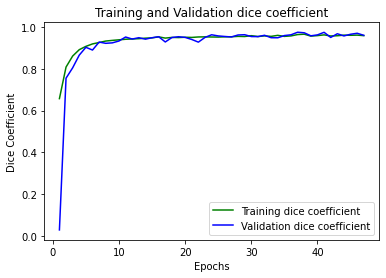

In [ ]:
loss_train = history2.history['dice_coefficient']
loss_val = history2.history['val_dice_coefficient']
nr_epochs = 50
epochs = range(1,nr_epochs+1)
plt.plot(epochs[:len(loss_train)], loss_train[:len(loss_train)], 'g', label='Training dice coefficient')
plt.plot(epochs[:len(loss_train)], loss_val[:len(loss_train)], 'b', label='Validation dice coefficient')
plt.title('Training and Validation dice coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.show()

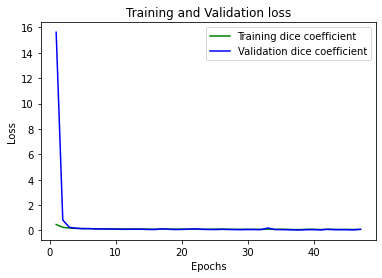

In [ ]:
loss_train_l = history2.history['loss']
loss_val_l = history2.history['val_loss']
nr_epochs = 50
epochs = range(1,nr_epochs+1)
plt.plot(epochs[:len(loss_train_l)], loss_train_l[:len(loss_train_l)], 'g', label='Training dice coefficient')
plt.plot(epochs[:len(loss_train_l)], loss_val_l[:len(loss_train_l)], 'b', label='Validation dice coefficient')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing

In [ ]:
def calculate_dice(y_true,y_pred):
    dice=dice_coefficient(y_true,y_pred)
    result=round(tf.keras.backend.get_value(dice),3)
    return result

In [ ]:
def choose_slice(patient):
    max_t_px = 0
    nr_slice = 0
    for x in range(patient.shape[2]):
        px = np.count_nonzero(patient[:,:,x,1] == 1)
        if px >= max_t_px:
            nr_slice = x
            max_t_px = px
    return nr_slice

In [ ]:
def choose_slice_best(patient,true):
    volume = np.copy(patient)
    max_dice = 0
    nr_slice = 0
    for z in range(patient.shape[2]):
        pat = np.copy(patient)
        dice, _ = automate_thrs(pat,true,z,1)
        px = np.count_nonzero(true[:,:,z,1] == 1)
#         print('dice' + str(dice))
#         print('px'+str(px))
        if dice>max_dice and px>0:
#             print(z)
            max_dice = dice
            nr_slice = z
    return nr_slice

In [ ]:
def automate_thrs(volume,true,x,cls):
    
    thrs = [i/100 for i in range(100)]
    max_dice = 0
    thr_max = 0

    for t in thrs:
        patient = np.copy(volume)
        patient[:,:,x,cls] = np.where( patient[:,:,x,cls]>=t, 1, patient[:,:,x,cls])
        patient[:,:,x,cls] = np.where( patient[:,:,x,cls]<t, 0, patient[:,:,x,cls])
        dice = calculate_dice(true[:,:,x,cls],patient[:,:,x,cls])
        if dice>max_dice:
            thr_max = t
            max_dice = dice
    
    return max_dice, thr_max

In [ ]:
# predict_pacurar = model_unet_3d.predict(patients)
# predicted_labels_pacurar = np.copy(predict_pacurar)

In [ ]:
# def predicted_categorical_truth(nr,thr_w,thr_t):
#     fig, ax = plt.subplots(1,5, figsize=[8, 8])
# #     fig.suptitle('Predicted masks vs Ground truth', fontsize=16)
#     x = choose_slice(y_test[nr])
#     img_label_0 = patients[nr][:,:,x]
# #     img_label_1 = denoise_bilateral(predicted_labels_pacurar[nr][:,:,x,2], sigma_color=0.1, sigma_spatial=15)
# #     img_label_2 = denoise_bilateral(predicted_labels_pacurar[nr][:,:,x,1], sigma_color=0.01, sigma_spatial=20)
#     img_label_1 = predicted_labels_pacurar[nr][:,:,x,2]
#     img_label_2 = predicted_labels_pacurar[nr][:,:,x,1]
# #     img_label_1 = predicted_labels_pacurar[nr][:,:,x,2]
# #     img_label_2 = predicted_labels_pacurar[nr][:,:,x,1]
    
#     img_label_1_p = np.where(img_label_1>=thr_w,1,img_label_1)
#     img_label_1_p = np.where(img_label_1_p<thr_w,0,img_label_1_p)
#     img_label_2_p = np.where(img_label_2>=thr_t,1,img_label_2)
#     img_label_2_p = np.where(img_label_2_p<thr_t,0,img_label_2_p)
    
#     img_label_1 = img_label_1_p
#     img_label_2 = img_label_2_p

#     img_label_3=y_test[nr][:,:,x,1]
#     img_label_4=y_test[nr][:,:,x,2]
    
#     rotated_img_lb_0 = ndimage.rotate(img_label_0, 270)
#     rotated_img_lb_1 = ndimage.rotate(img_label_1, 270)
#     rotated_img_lb_2 = ndimage.rotate(img_label_2, 270)
#     rotated_img_lb_3 = ndimage.rotate(img_label_3, 270)
#     rotated_img_lb_4 = ndimage.rotate(img_label_4, 270)
    
# #     prediction = predicted_labels_pacurar[nr]
    
#     dice_p,dice_t = slice_calculate_dice(predicted_labels_pacurar[nr], y_test[nr], x, thr_w, thr_t)
#     dice_p = round(tf.keras.backend.get_value(dice_p),3)
#     dice_t = round(tf.keras.backend.get_value(dice_t),3)
    
#     ax[0].imshow(rotated_img_lb_0,cmap='gray')
#     ax[0].axis('off')
#     ax[1].set_title("    DSC for wall: "+str(dice_p))
#     ax[1].imshow(rotated_img_lb_4,cmap='gray')
#     ax[1].axis('off')
# #     ax[0][1].set_title("Dice value for wall: "+str(dice_p))
#     ax[2].imshow(rotated_img_lb_1,cmap='gray')
#     ax[2].axis('off')
#     ax[3].set_title("       DSC for tumor: "+str(dice_t))
#     ax[3].imshow(rotated_img_lb_3,cmap='gray')
#     ax[3].axis('off')
#     ax[4].imshow(rotated_img_lb_2,cmap='gray')
#     ax[4].axis('off')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# def predicted_categorical_truth(nr,thr_w=0.1,thr_t=0.1,thr_b=0.001):
#     fig, ax = plt.subplots(1,7, figsize=[8, 8])
#     x = choose_slice(y_test[nr])
#     img_label_0 = patients[nr][:,:,x]
# #     img_label_1 = denoise_bilateral(predicted_labels_pacurar[nr][:,:,x,2], sigma_color=0.1, sigma_spatial=15)
# #     img_label_2 = denoise_bilateral(predicted_labels_pacurar[nr][:,:,x,1], sigma_color=0.01, sigma_spatial=20)
#     img_label_2 = np.copy(predicted_labels_pacurar[nr][:,:,x,2])
#     img_label_4 = np.copy(predicted_labels_pacurar[nr][:,:,x,1])
#     img_label_6 = np.copy(predicted_labels_pacurar[nr][:,:,x,0])
# #     img_label_1 = predicted_labels_pacurar[nr][:,:,x,2]
# #     img_label_2 = predicted_labels_pacurar[nr][:,:,x,1]
    
#     img_label_2_p = np.where(img_label_2>=thr_w,1,img_label_2)
#     img_label_2_p = np.where(img_label_2_p<thr_w,0,img_label_2_p)
#     img_label_4_p = np.where(img_label_4>=thr_t,1,img_label_4)
#     img_label_4_p = np.where(img_label_4_p<thr_t,0,img_label_4_p)
#     img_label_6_p = np.where(img_label_6>=0.8,1,img_label_6)
#     img_label_6_p = np.where(img_label_6_p<0.8,0,img_label_6_p)
    
#     img_label_2 = img_label_2_p
#     img_label_4 = img_label_4_p
#     img_label_6 = img_label_6_p

#     img_label_1=y_test[nr][:,:,x,2]
#     img_label_3=y_test[nr][:,:,x,1]
#     img_label_5=y_test[nr][:,:,x,0]
    
#     rotated_img_lb_0 = ndimage.rotate(img_label_0, 270)
#     rotated_img_lb_1 = ndimage.rotate(img_label_1, 270)
#     rotated_img_lb_2 = ndimage.rotate(img_label_2, 270)
#     rotated_img_lb_3 = ndimage.rotate(img_label_3, 270)
#     rotated_img_lb_4 = ndimage.rotate(img_label_4, 270)
#     rotated_img_lb_5 = ndimage.rotate(img_label_5, 270)
#     rotated_img_lb_6 = ndimage.rotate(img_label_6, 270)
    
# #     prediction = predicted_labels_pacurar[nr]
    
#     dice_p, dice_t, dice_b = slice_calculate_dice(predicted_labels_pacurar[nr], y_test[nr], x, thr_w, thr_t, thr_b)
#     dice_p = round(tf.keras.backend.get_value(dice_p),3)
#     dice_t = round(tf.keras.backend.get_value(dice_t),3)
    
#     ax[0].imshow(rotated_img_lb_0,cmap='gray')
#     ax[0].axis('off')
#     ax[1].set_title("    DSC for wall: "+str(dice_p))
#     ax[1].imshow(rotated_img_lb_1,cmap='gray')
#     ax[1].axis('off')
# #     ax[0][1].set_title("Dice value for wall: "+str(dice_p))
#     ax[2].imshow(rotated_img_lb_2,cmap='gray')
#     ax[2].axis('off')
#     ax[3].set_title("       DSC for tumor: "+str(dice_t))
#     ax[3].imshow(rotated_img_lb_3,cmap='gray')
#     ax[3].axis('off')
#     ax[4].imshow(rotated_img_lb_4,cmap='gray')
#     ax[4].axis('off')
#     ax[5].set_title("       DSC for bg: "+str(dice_b))
#     ax[5].imshow(rotated_img_lb_5,cmap='gray')
#     ax[5].axis('off')
#     ax[6].imshow(rotated_img_lb_6,cmap='gray')
#     ax[6].axis('off')
#     plt.tight_layout()
#     plt.show()

In [ ]:
def predicted_categorical_truth(fname, thr_w=0.1,thr_t=0.1,thr_b=0.9):
    fig, ax = plt.subplots(5,7, figsize=[8, 8])
    
#     x = choose_slice(y_test[nr])
    for i in range(5):
        x = choose_slice_best(predicted_labels_pacurar[i], y_test[i])
        img_label_0 = patients[i][:,:,x]
        img_label_1=y_test[i][:,:,x,2]
        img_label_3=y_test[i][:,:,x,1]
        img_label_5=y_test[i][:,:,x,0]

        img_label_2 = np.copy(predicted_labels_pacurar[i][:,:,x,2])
        img_label_4 = np.copy(predicted_labels_pacurar[i][:,:,x,1])
        img_label_6 = np.copy(predicted_labels_pacurar[i][:,:,x,0])


        dice_b, thr_b = automate_thrs(predicted_labels_pacurar[i],y_test[i],x,0)
        dice_p, thr_w = automate_thrs(predicted_labels_pacurar[i],y_test[i],x,2)
        dice_t, thr_t = automate_thrs(predicted_labels_pacurar[i],y_test[i],x,1)

        img_label_2_p = np.where(img_label_2>=thr_w,1,img_label_2)
        img_label_2_p = np.where(img_label_2_p<thr_w,0,img_label_2_p)
        img_label_4_p = np.where(img_label_4>=thr_t,1,img_label_4)
        img_label_4_p = np.where(img_label_4_p<thr_t,0,img_label_4_p)
        img_label_6_p = np.where(img_label_6>=thr_b,1,img_label_6)
        img_label_6_p = np.where(img_label_6_p<thr_b,0,img_label_6_p)

        img_label_2 = img_label_2_p
        img_label_4 = img_label_4_p
        img_label_6 = img_label_6_p


        rotated_img_lb_0 = ndimage.rotate(img_label_0, 270)
        rotated_img_lb_1 = ndimage.rotate(img_label_1, 270)
        rotated_img_lb_2 = ndimage.rotate(img_label_2, 270)
        rotated_img_lb_3 = ndimage.rotate(img_label_3, 270)
        rotated_img_lb_4 = ndimage.rotate(img_label_4, 270)
        rotated_img_lb_5 = ndimage.rotate(img_label_5, 270)
        rotated_img_lb_6 = ndimage.rotate(img_label_6, 270)


        dice_b = round(tf.keras.backend.get_value(dice_b),3)
        dice_p = round(tf.keras.backend.get_value(dice_p),3)
        dice_t = round(tf.keras.backend.get_value(dice_t),3)

        ax[i][0].imshow(rotated_img_lb_0,cmap='gray')
        ax[i][0].axis('off')
        ax[i][1].set_title("    DSC for wall: "+str(dice_p))
        ax[i][1].imshow(rotated_img_lb_1,cmap='gray')
        ax[i][1].axis('off')
    #     ax[0][1].set_title("Dice value for wall: "+str(dice_p))
        ax[i][2].imshow(rotated_img_lb_2,cmap='gray')
        ax[i][2].axis('off')
        ax[i][3].set_title("       DSC for tumor: "+str(dice_t))
        ax[i][3].imshow(rotated_img_lb_3,cmap='gray')
        ax[i][3].axis('off')
        ax[i][4].imshow(rotated_img_lb_4,cmap='gray')
        ax[i][4].axis('off')
        ax[i][5].set_title("       DSC for bg: "+str(dice_b))
        ax[i][5].imshow(rotated_img_lb_5,cmap='gray')
        ax[i][5].axis('off')
        ax[i][6].imshow(rotated_img_lb_6,cmap='gray')
        ax[i][6].axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig(fname)


In [ ]:
def slice_calculate_dice(vol_pred, vol_true, x, thr_w, thr_t, thr_b):
    prediction = np.copy(vol_pred)
    prediction[:,:,x,2] = np.where(prediction[:,:,x,2]>=thr_w,1,prediction[:,:,x,2])
    prediction[:,:,x,2] = np.where(prediction[:,:,x,2]<thr_w,0,prediction[:,:,x,2])
    prediction[:,:,x,1] = np.where(prediction[:,:,x,1]>=thr_t,1,prediction[:,:,x,1])
    prediction[:,:,x,1] = np.where(prediction[:,:,x,1]<thr_t,0,prediction[:,:,x,1])
    prediction[:,:,x,0] = np.where(prediction[:,:,x,0]>=thr_b,1,prediction[:,:,x,0])
    prediction[:,:,x,0] = np.where(prediction[:,:,x,0]<thr_b,0,prediction[:,:,x,0])

    dice_b = calculate_dice(vol_true[:,:,x,0], prediction[:,:,x,0])
    dice_t = calculate_dice(vol_true[:,:,x,1], prediction[:,:,x,1])
    dice_p = calculate_dice(vol_true[:,:,x,2], prediction[:,:,x,2])
    return dice_p, dice_t, dice_b


In [ ]:
def slice_calculate_dice_updated(vol_pred, vol_true, x, thr_w, thr_t, thr_b):
    prediction = np.copy(vol_pred)
    prediction[:,:,x,2] = np.where(prediction[:,:,x,2]>=prediction[:,:,x,1] and prediction[:,:,x,2]>=prediction[:,:,x,0],1,prediction[:,:,x,2])
    prediction[:,:,x,2] = np.where(prediction[:,:,x,2]!=1,0,prediction[:,:,x,2])
    prediction[:,:,x,1] = np.where(prediction[:,:,x,1]>=prediction[:,:,x,2] and prediction[:,:,x,1]>=prediction[:,:,x,0],1,prediction[:,:,x,1])
    prediction[:,:,x,1] = np.where(prediction[:,:,x,1]!=1,0,prediction[:,:,x,1])
    prediction[:,:,x,0] = np.where(prediction[:,:,x,0]>=prediction[:,:,x,2] and prediction[:,:,x,0]>=prediction[:,:,x,1],1,prediction[:,:,x,0])
    prediction[:,:,x,0] = np.where(prediction[:,:,x,0]!=1,0,prediction[:,:,x,0])

    dice_b = calculate_dice(vol_true[:,:,x,0], prediction[:,:,x,0])
    dice_t = calculate_dice(vol_true[:,:,x,1], prediction[:,:,x,1])
    dice_p = calculate_dice(vol_true[:,:,x,2], prediction[:,:,x,2])
    return dice_p, dice_t, dice_b


In [ ]:
patients = x_test
labels = y_test
# model_unet_3d = model_unet_3d_5_lvl
# model_unet_3d = model_unet_3d_5_lvl
# model_unet_3d = model_unet_3d_6_lvl
# model_unet_3d = model_unet_3d_4_lvl

In [ ]:
# # TREBUIE SA SCOT PARTEA ASTA PT SCENARIUL 3
predict_pacurar = model_unet_3d.predict(patients)
predicted_labels_pacurar = np.copy(predict_pacurar)

# predict_pacurar_2 = model_unet_3d_2.predict(patients)
# predicted_labels_pacurar_2 = np.copy(predict_pacurar_2)

# predict_pacurar_3 = model_unet_3d_3.predict(patients)
# predicted_labels_pacurar_3 = np.copy(predict_pacurar_3)

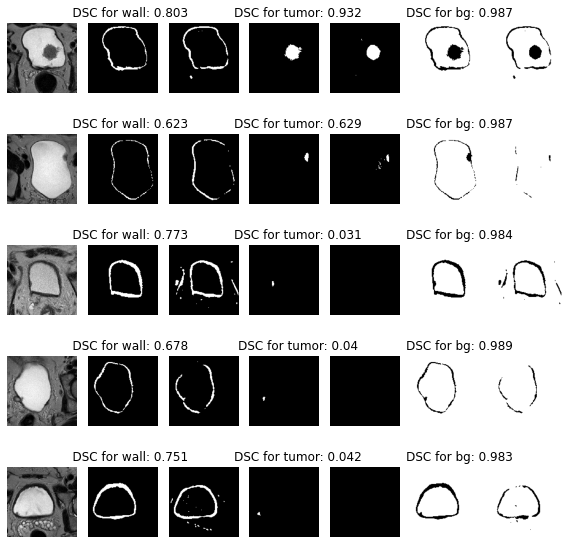

<Figure size 432x288 with 0 Axes>

In [ ]:
predicted_categorical_truth("Lvl_4_Dilated.jpg")

# Tensorboard 

In [ ]:
# !tensorboard --logdir=./output/logs/fit/20210728-185949 --host localhost --port 8088
# !tensorboard --logdir="./output/logs/fit/20210728-185949" --host localhost --port 8088
# !tensorboard --logdir="./output/logs/fit/20210728-185949" --host localhost --port 6006

# Salvarea modelului

In [ ]:
# model_unet_3d.save('model_4lvl_weigh_cat_cross_40epchs_scenariur_bch2.h5')

In [ ]:
# def evaluation_history_model(history1):
#     eval_dice_coef=np.mean(history1.history['val_dice_coefficient'])
#     eval_accuracy=np.mean(history1.history['val_accuracy'])
    
#     return eval_accuracy,eval_dice_coef

In [ ]:
# evaluation_history_model(history)

In [ ]:
# evaluation_history_model(history_2)

In [ ]:
def volume_calculate_dice(vol_pred,vol_true, thr_w=0.1, thr_t=0.1, thr_b=0.8):
    dice_p = 0
    dice_t = 0
    dice_b = 0
    for z in range(vol_pred.shape[2]):
        patient = np.copy(vol_pred)
        dice_b_z, thr_b = automate_thrs(patient,vol_true,z,0)
        dice_p_z, thr_w = automate_thrs(patient,vol_true,z,2)
        dice_t_z, thr_t = automate_thrs(patient,vol_true,z,1)

        dice_p += dice_p_z
        dice_t += dice_t_z
        dice_b += dice_b_z
    return dice_p/vol_pred.shape[2], dice_t/vol_pred.shape[2], dice_b/vol_pred.shape[2]

def total_dice(list_vol_pred,list_vol_true,thr_w=0.1, thr_t=0.1, thr_b=0.8):
    d_p = 0
    d_t = 0
    d_b = 0
    for i in range(len(list_vol_pred)):
        d_p_i,d_t_i,d_b_i = volume_calculate_dice(list_vol_pred[i],list_vol_true[i], thr_w, thr_t, thr_b)
        d_p += d_p_i
        d_t += d_t_i
        d_b += d_b_i
    return d_p/len(list_vol_pred),d_t/len(list_vol_pred),d_b/len(list_vol_pred)

In [ ]:
d_p, d_t, d_b = total_dice(predicted_labels_pacurar,y_test,0.1,0.1)
# print("lvl 4: wall: "+ str(d_p)+" tumor: "+str(d_t)+ " bg: "+ str(d_b))
print("lvl 5: wall: "+ str(d_p)+" tumor: "+str(d_t)+ " bg: "+ str(d_b))
# print("lvl 6: wall: "+ str(d_p)+" tumor: "+ str(d_t))

lvl 5: wall: 0.842718749307096 tumor: 0.8918625002494082 bg: 0.9930000007152557


In [ ]:
print("medie: " + str((d_p+d_t+d_b)/3))

medie: 0.9091937500905867
